In [101]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from final.feature_extraction.vectorization import text_vectorizaion
from final.dimension_reduction.feature_reduction import dimension_reduction


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import accuracy_score, f1_score

matplotlib.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.constrained_layout.use'] = True

In [3]:
df = pd.read_csv("data/random_samples/stratified_sampling_clean_text_data_by_price_whigh_sz50000_1619835594.csv")
df.shape

(50000, 34)

In [4]:
# if tfidf = True using TfidfVectorizer, else using CountVectorizer
# max_features: max number of feature generated for the input text string
description_feature,  description_feature_name = text_vectorizaion(df, text_col = "clean_item_description", 
                                                                   tfidf = True, min_df=10, max_features=100000)

# Evaluation Setup

In [11]:
df['log_price'] = np.log(df.price.values)

In [72]:
df['log_price'].min()

3.0

In [13]:
df[['price','log_price']].describe()

,price,log_price
count,50000.00000,50000.000000
mean,108.41749,3.838638
std,198.75487,1.260500
min,3.00000,1.098612
25%,20.00000,2.995732
50%,50.00000,3.912023
75%,90.00000,4.499810
max,2009.00000,7.605392


# KMeans

In [6]:
data = dimension_reduction(description_feature.toarray(), method = 'KMeans', n_comp = 500)

In [14]:
data.shape

(50000, 500)

In [27]:
X_train, X_test, price_train, price_test, log_price_train, log_price_test = train_test_split(data, 
                                                                                             df['price'].values, df['log_price'].values, 
                                                                                             test_size=0.3, random_state=12334)

In [28]:
X_train.shape

(35000, 500)

In [37]:
price_train

array([  9.,  30., 314., ...,  26., 121.,  44.])

In [38]:
log_price_train

array([2.19722458, 3.40119738, 5.74939299, ..., 3.25809654, 4.79579055,
       3.78418963])

In [33]:
np.exp(log_price_train)

array([  9.,  30., 314., ...,  26., 121.,  44.])

## Train with regular price

In [57]:
rf_reg = RandomForestRegressor(n_estimators=50).fit(X_train, price_train)

In [62]:
price_train_pred = rf_reg.predict(X_train)
price_test_pred = rf_reg.predict(X_test)

In [63]:
price_train_pred.min()

3.02

In [64]:
price_test_pred.min()

5.88

In [87]:
print("Evaluation of Predict Regular Price using Random Forest")
print('Train RMSE:   %-5.5f' % np.sqrt(mean_squared_error(price_train, price_train_pred)), end ="\t\t")
print('Test  RMSE:   %-5.5f' % np.sqrt(mean_squared_error(price_test, price_test_pred)))


print('Train RMSLE:  %-5.5f' % np.sqrt(mean_squared_log_error(price_train, price_train_pred)), end ="\t\t")
print('Test  RMSLE:  %-5.5f' % np.sqrt(mean_squared_log_error(price_test, price_test_pred)))


print('Train R^2:    %-5.5f' % r2_score(price_train, price_train_pred), end ="\t\t")
print('Test  R^2:    %-5.5f' % r2_score(price_test, price_test_pred))

Evaluation of Predict Regular Price using Random Forest
Train RMSE:   55.95464		Test  RMSE:   96.30018
Train RMSLE:  0.67179		Test  RMSLE:  1.03300
Train R^2:    0.92097		Test  R^2:    0.76361


## Train with Log price

In [60]:
log_rfreg = RandomForestRegressor().fit(X_train, log_price_train)
log_price_train_pred = log_rfreg.predict(X_train)
log_price_test_pred = log_rfreg.predict(X_test)

In [76]:
log_price_test.min()

1.0986122886681098

In [77]:
logprice_test_pred.min()

1.209934570545967

In [78]:
print('Train RMSE: %-5.5f' % np.sqrt(mean_squared_error(log_price_train, log_price_train_pred)))
print('Test RMSE: %-5.5f' % np.sqrt(mean_squared_error(log_price_test, log_price_test_pred)))

Train RMSE: 0.46319
Test RMSE: 0.90472


In [79]:
y_train_origin_price = np.exp(log_price_train)
y_train_origin_pred_price = np.exp(log_price_train_pred)
y_test_origin_price = np.exp(log_price_test)
y_test_origin_pred_price = np.exp(log_price_test_pred)

In [80]:
print('Train RMSE: %-5.5f' % np.sqrt(mean_squared_error(y_train_origin_price, y_train_origin_pred_price)))
print('Train RMSLE: %-5.5f' % np.sqrt(mean_squared_log_error(y_train_origin_price, y_train_origin_pred_price)))
print('Test RMSE: %-5.5f' % np.sqrt(mean_squared_error(y_test_origin_price, y_test_origin_pred_price)))
print('Test RMSLE: %-5.5f' % np.sqrt(mean_squared_log_error(y_test_origin_price, y_test_origin_pred_price)))

Train RMSE: 67.70248
Train RMSLE: 0.43926
Test RMSE: 104.85512
Test RMSLE: 0.86593


In [89]:
print("Evaluation of Predict Log Price using Random Forest")
print('Train RMSE:   %-5.5f' % np.sqrt(mean_squared_error(y_train_origin_price, y_train_origin_pred_price)), end ="\t\t")
print('Test  RMSE:   %-5.5f' % np.sqrt(mean_squared_error(y_test_origin_price, y_test_origin_pred_price)))


print('Train RMSLE:  %-5.5f' % np.sqrt(mean_squared_log_error(y_train_origin_price, y_train_origin_pred_price)), end ="\t\t")
print('Test  RMSLE:  %-5.5f' % np.sqrt(mean_squared_log_error(y_test_origin_price, y_test_origin_pred_price)))


print('Train R^2:    %-5.5f' % r2_score(y_train_origin_price, y_train_origin_pred_price), end ="\t\t")
print('Test  R^2:    %-5.5f' % r2_score(y_test_origin_price, y_test_origin_pred_price))

Evaluation of Predict Log Price using Random Forest
Train RMSE:   67.70248		Test  RMSE:   104.85512
Train RMSLE:  0.43926		Test  RMSLE:  0.86593
Train R^2:    0.88431		Test  R^2:    0.71975


<AxesSubplot:>

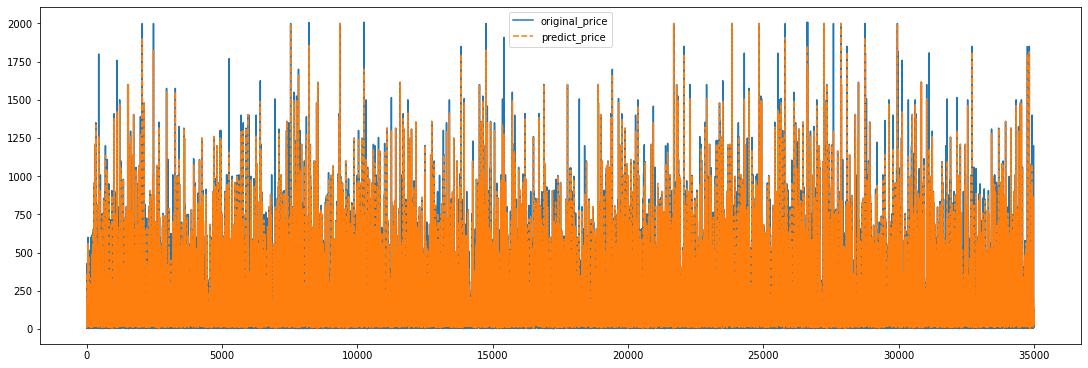

In [90]:
pred_df = pd.DataFrame({'original_price':price_train, 'predict_price':price_train_pred})
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=pred_df, ax=ax)

In [115]:
def plot(origin, predict, title):
    _, ax = plt.subplots(figsize = (15,5))
# matplotlib.rcParams['figure.figsize'] = (10, 10)
    ax.scatter(x = range(0, origin.size), y=origin, c = 'blue', label = 'Actual Price', alpha = 0.2)
    ax.scatter(x = range(0, predict.size), y=predict, c = 'red', label = 'Predicted Price', alpha = 0.2)

    plt.title(title, fontdict = {'fontsize' : 20})
    plt.xlabel('Observations')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()

In [105]:
less_50_item = (price_test <= 50).nonzero()[0]
less_50_item.size

7508

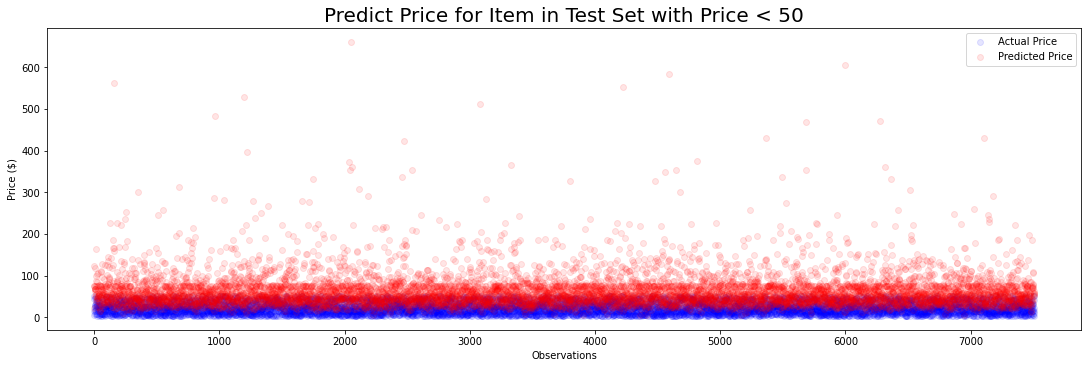

In [112]:
plot(price_test[less_50_item], price_test_pred[less_50_item], 
     title = "Predict Price for Item in Test Set with Price < 50")

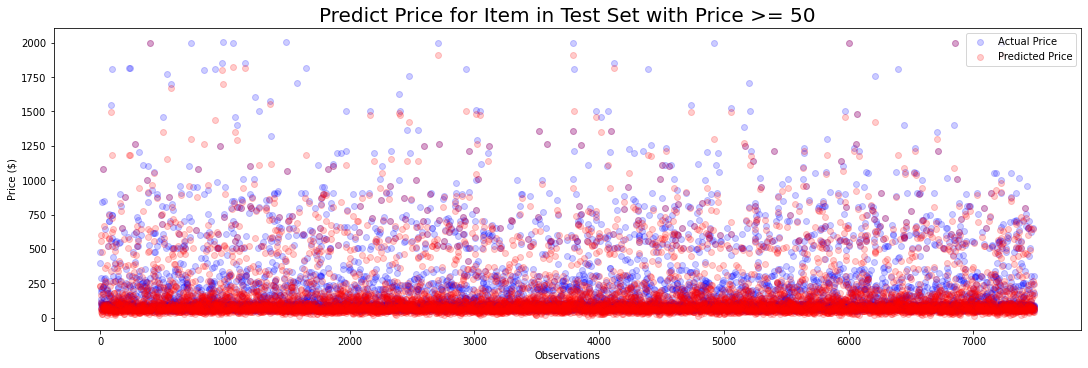

In [119]:
great_100_item = (price_test >= 50).nonzero()[0]
plot(price_test[great_50_item], price_test_pred[great_50_item], 
     title = "Predict Price for Item in Test Set with Price >= 50")

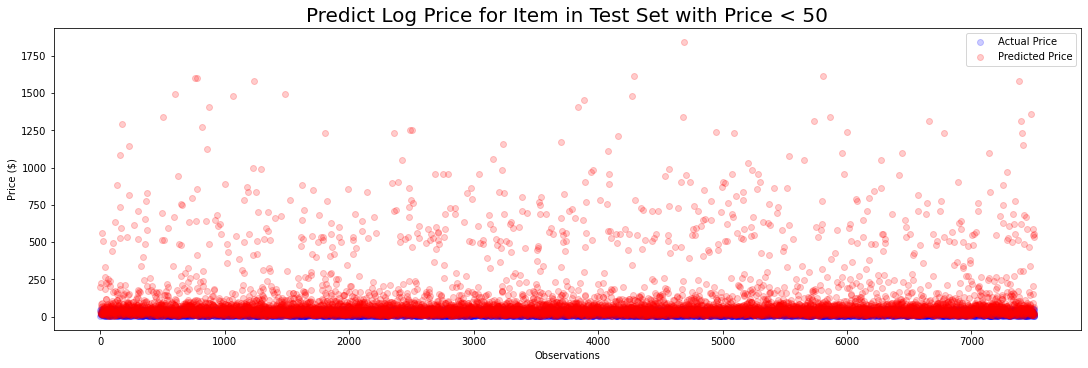

In [117]:
less_50_item = (y_test_origin_price <= 50).nonzero()[0]
plot(y_test_origin_price[less_50_item], y_train_origin_pred_price[less_50_item], 
     title = "Predict Log Price for Item in Test Set with Price < 50")

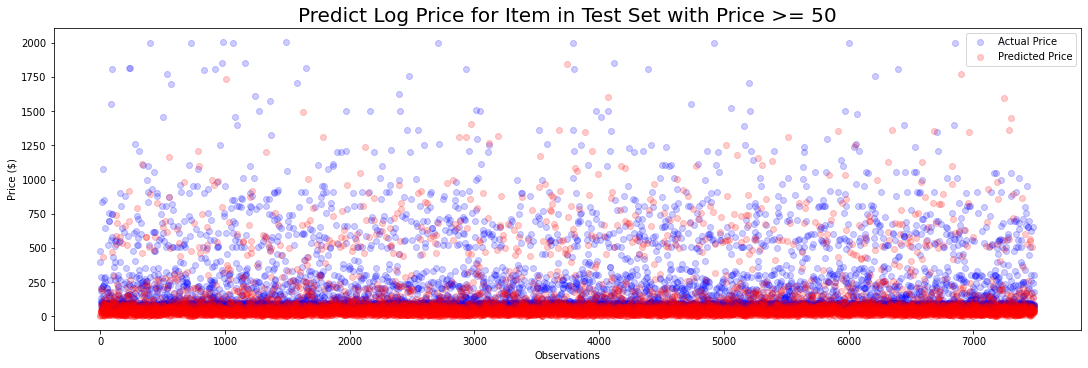

In [120]:
great_50_item = (y_test_origin_price >= 50).nonzero()[0]
plot(y_test_origin_price[great_50_item], y_train_origin_pred_price[great_50_item], 
     title = "Predict Log Price for Item in Test Set with Price >= 50")